In [3]:
from src.training.training import train_model, train_and_save, load_model
from src.models.get_data import get_tensors
from src.visualization.brier_score import make_brier_skill_plot
from src.visualization.plot_forecasts import plot_weight_mixture
import numpy as np
import tensorflow as tf

2024-04-16 12:53:37.817404: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-16 12:53:37.843851: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-16 12:53:37.843876: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-16 12:53:37.844568: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-16 12:53:37.848647: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-16 12:53:37.849138: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [5]:
forecast_distribution = 'distr_mixture_linear'
distribution_1 = 'distr_trunc_normal'
distribution_2 = 'distr_log_normal'

loss = 'loss_twCRPS_sample' # options: loss_CRPS_sample, loss_twCRPS_sample, loss_log_likelihood

chain_function = 'chain_function_normal_cdf_plus_constant' # options: chain_function_normal_cdf, chain_function_indicator, chain_function_normal_cdf_plus_constant
chain_function_mean = 12
chain_function_std = 1
chain_function_threshold = 15 # 12 / 15
chain_function_constant = 0.40

optimizer = 'Adam'
learning_rate = 0.03
folds = [1,2]
neighbourhood_size = 11
ignore = ['229', '285', '323']
epochs = 600

#parameters = {'weight_a': tf.constant([1.54], dtype=tf.float32), 'weight_b': tf.constant([-0.15], dtype=tf.float32)}

samples = 100
printing = False
pretrained = True
random_init = True

all_features = ['wind_speed', 'press', 'kinetic', 'humid', 'geopot']

location_features = ['wind_speed', 'press', 'kinetic', 'humid', 'geopot']

scale_features = ['wind_speed', 'press', 'kinetic', 'humid', 'geopot']

In [6]:
models = {} 
for i in range(0, 3):
    model = train_model(
    forecast_distribution,
    loss,
    optimizer,
    learning_rate,
    folds,
    all_features,
    location_features,
    scale_features,
    neighbourhood_size,
    ignore,
    epochs,

    chain_function = chain_function,
    chain_function_mean = chain_function_mean,
    chain_function_std = chain_function_std,
    chain_function_constant = chain_function_constant,
    chain_function_threshold = chain_function_threshold,
    samples = samples,
    printing = printing,
    distribution_1 = distribution_1,
    distribution_2 = distribution_2,
    pretrained = pretrained,
    random_init = random_init,
    )
    models[str(i)] = model
    print("Done with model " + str(i))

Using random initialization for Truncated Normal distribution
Using random initialization for Log Normal distribution
Final loss:  0.5031144
Final loss:  0.4253708
Using given parameters for Truncated Normal distribution
Using given parameters for Log Normal distribution
Using default weight parameters for weights in Mixture Linear distribution
Final loss:  0.42008728
Done with model 0
Using random initialization for Truncated Normal distribution
Using random initialization for Log Normal distribution
Final loss:  0.44323084
Final loss:  0.42982128
Using given parameters for Truncated Normal distribution
Using given parameters for Log Normal distribution
Using default weight parameters for weights in Mixture Linear distribution
Final loss:  0.41920373
Done with model 1
Using random initialization for Truncated Normal distribution
Using random initialization for Log Normal distribution
Final loss:  0.42777553
Final loss:  0.42754394
Using given parameters for Truncated Normal distributi

In [7]:
test_fold = 3
ignore = ['229', '285', '323']
X_test, y_test = get_tensors(neighbourhood_size, all_features, test_fold, ignore)
X_test = models['0'].normalize_features(X_test)

In [8]:
folder = '/net/pc200239/nobackup/users/hakvoort/models/emos/'

base_model = load_model(folder + 'trunc_normal/tn_crps__epochs600_folds_1_2_mean0_1_2_3_4_std0_1_2_3_4_.pkl')

Using given parameters for Truncated Normal distribution


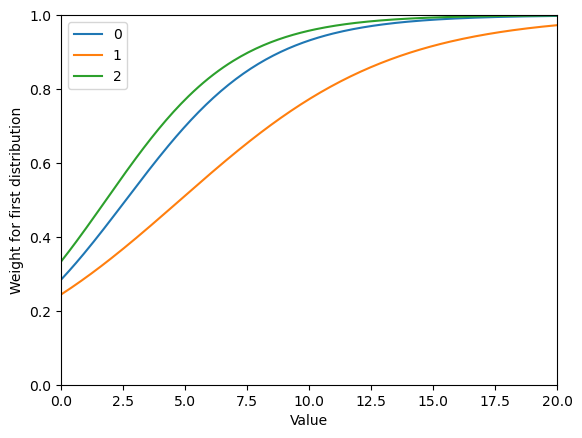

In [9]:

values = np.linspace(0, 20, 200)

plot_weight_mixture(models, values)

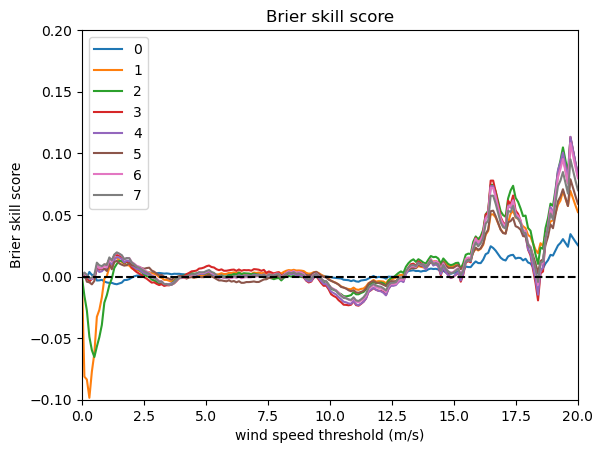

In [7]:
make_brier_skill_plot(base_model, models, X_test, y_test, values, ylim=[-0.1,0.2])